In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results_0206_v2.csv')

In [10]:
df['1_cost_gap%'] = (df['greedy_cost'] - df['alternative2_cost']) / df['greedy_cost']

df['1_time_gap%'] = (df['greedy_time'] - df['alternative2_time']) / df['greedy_time']

df['1_yield_gap%'] = (df['greedy_benefit'] - df['alternative2_benefit']) / df['greedy_benefit']

df['2_cost_gap%'] = (df['batching_cost'] - df['alternative2_cost']) / df['batching_cost']

df['2_time_gap%'] = (df['batching_time'] - df['alternative2_time']) / df['batching_time']

df['2_yield_gap%'] = (df['batching_benefit'] - df['alternative2_benefit']) / df['batching_benefit']

In [11]:
# Tamaños de muestras por los cuales agrupar
sample_sizes = [10, 100, 250, 500]

# Agrupamos la data por tamaño de muestra y calculamos la media para columna
grouped_df = df.groupby('n').mean().reset_index()

In [12]:
columns_greedy_vs_alternative = ['n','1_cost_gap%','1_time_gap%','1_yield_gap%']
columns_batching_vs_alternative = ['n','2_cost_gap%','2_time_gap%','2_yield_gap%']

table_greedy = (grouped_df[columns_greedy_vs_alternative] * 100).round(2)
table_batching = (grouped_df[columns_batching_vs_alternative] * 100).round(2)

# Convert DataFrame to Markdown table
table_g = table_greedy.to_markdown(index=False)
table_b = table_batching.to_markdown(index=False)

# Save table to a .md file
with open('gap_greedy_vs._alternative_1.md', 'w') as file:
    file.write(table_g)

with open('gap_batching_vs._alternative_1.md', 'w') as file:
    file.write(table_b)

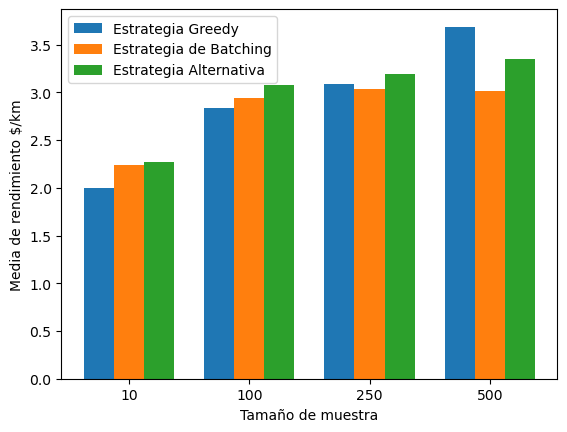

In [13]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
greedy_rend_km = grouped_df['greedy_benefit']
batching_rend_km = grouped_df['batching_benefit']
alternative_rend_km = grouped_df['alternative2_benefit']

# Posicionamiento de las barras
bar_width = 0.25
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_rend_km, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')
plt.bar(r3, alternative_rend_km, width=bar_width, label='Estrategia Alternativa')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media de rendimiento $/km')
# plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching vs. Alternativo')
plt.xticks([r + bar_width for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()